<a href="https://colab.research.google.com/github/sunfishes/Data-Analysys-Programming-2/blob/main/OTT_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/오티티분석/ott_analysis.csv", encoding="euc-kr")

In [3]:
df.head()

,serial number,year,nation,classification,division,number_of_cases,drama,variety,music,news,...,comedy,cultureart,quizeshow,quizeshow.1,kids,reality,religion,lifestyle,series,etc
0,1,2019,India,country,all,322,9.6,2.5,9.3,9.9,...,10.6,0.0,0.0,2.2,1.2,8.4,0.3,0.0,0.0,0.3
1,2,2019,Turkey,country,all,321,4.4,3.1,2.8,7.8,...,9.0,0.0,2.5,1.2,5.9,4.0,0.6,0.0,0.9,0.6
2,3,2019,Canada,country,all,281,15.3,2.5,3.6,6.8,...,19.2,0.0,0.0,2.8,3.2,5.0,0.7,0.0,0.4,0.4
3,4,2019,Hungary,country,all,223,5.4,0.9,9.0,2.2,...,14.3,0.0,0.0,1.8,0.9,4.0,0.0,0.0,3.1,1.3
4,5,2019,India,sex,male,159,7.5,3.1,10.7,10.1,...,10.1,0.0,0.0,2.5,1.9,4.4,0.0,0.0,0.0,0.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial number    110 non-null    int64  
 1   year             110 non-null    int64  
 2   nation           110 non-null    object 
 3   classification   110 non-null    object 
 4   division         110 non-null    object 
 5   number_of_cases  110 non-null    int64  
 6   drama            110 non-null    float64
 7   variety          110 non-null    float64
 8   music            110 non-null    float64
 9   news             110 non-null    float64
 10  education        110 non-null    float64
 11  movie            110 non-null    float64
 12  sports           110 non-null    float64
 13  dacumentary      110 non-null    float64
 14  animation        110 non-null    float64
 15  comedy           110 non-null    float64
 16  cultureart       110 non-null    float64
 17  quizeshow       

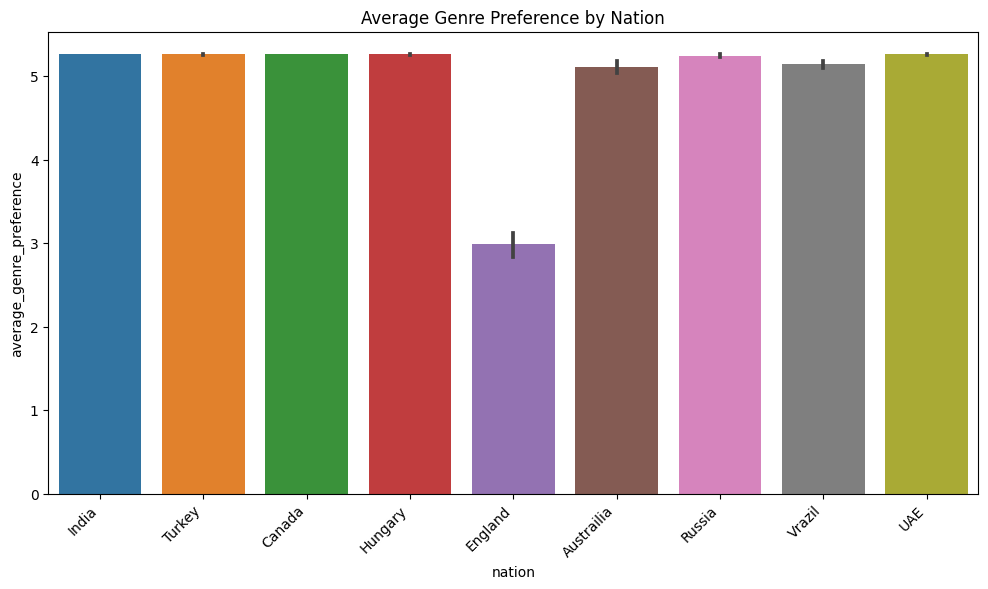

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 국가별로 장르 선호도의 평균 계산
genre_columns = ['drama', 'variety', 'music', 'news', 'education', 'movie', 'sports',
                 'dacumentary', 'animation', 'comedy', 'cultureart', 'quizeshow',
                 'quizeshow.1', 'kids', 'reality', 'religion', 'lifestyle', 'series', 'etc']

df['average_genre_preference'] = df[genre_columns].mean(axis=1)

# 국가별 평균 장르 선호도 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='nation', y='average_genre_preference', data=df)
plt.title('Average Genre Preference by Nation')
plt.xticks(rotation=45, ha='right')  # 국가 이름을 오른쪽으로 45도 회전하여 표시
plt.show()


수치형 변수(각 ott별 장르)의 통계를 나타내서 확인하였습니다.

In [6]:
import pandas as pd

# 수치형 변수들의 통계 정보
numeric_stats = df[['drama', 'variety', 'music', 'news', 'education', 'movie', 'sports', 'dacumentary', 'animation',
                    'comedy', 'cultureart', 'quizeshow', 'quizeshow.1', 'kids', 'reality', 'religion',
                    'lifestyle', 'series', 'etc']].describe()

print(numeric_stats)


            drama     variety       music        news   education       movie  \
count  110.000000  110.000000  110.000000  110.000000  110.000000  110.000000   
mean    10.883636    3.843636    5.991818    6.044545    2.290909   26.672727   
std      6.313834    4.969439    3.615566    3.419845    1.833458   12.027475   
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
25%      5.325000    1.200000    3.425000    4.000000    1.025000   19.550000   
50%     10.800000    2.550000    4.900000    5.850000    2.000000   27.050000   
75%     15.375000    3.925000    8.075000    7.800000    3.100000   35.600000   
max     28.600000   20.800000   19.400000   17.900000    7.100000   57.100000   

           sports  dacumentary   animation      comedy  cultureart  \
count  110.000000   110.000000  110.000000  110.000000  110.000000   
mean     8.388182     5.028182    2.941818   11.550000    0.644545   
std      5.199166     3.252497    2.800504    6.249694    1.

각 국가별 인기가 가장 많은 장르의 빈도수를 계산하여 그래프로 나타내었습니다.

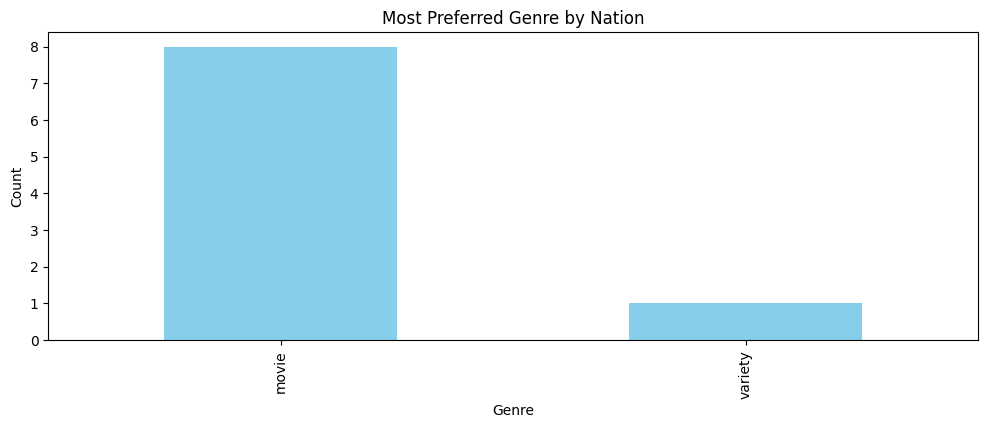

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 여기서 df는 데이터프레임을 나타냅니다.
# 예를 들어, df = pd.read_csv('your_file.csv')로 데이터를 불러왔다고 가정합니다.

# 각 국가에서 선호하는 장르의 빈도수 계산
most_watched_genre_counts = df.groupby('nation').apply(lambda x: x[['drama', 'variety', 'music', 'news', 'education', 'movie', 'sports',
                                                                    'dacumentary', 'animation', 'comedy', 'cultureart', 'quizeshow',
                                                                    'quizeshow.1', 'kids', 'reality', 'religion', 'lifestyle', 'series',
                                                                    'etc']].idxmax(axis=1).value_counts().idxmax())

# 그래프로 나타내기
plt.figure(figsize=(12, 4))
most_watched_genre_counts.value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Preferred Genre by Nation')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


가장 인기가 많은 장르가 영화와 버라이어티인것으로 나타났는데, 그 때 각 국가별 영화와 버라이어티 선호도를 그래프로 나타내었습니다.

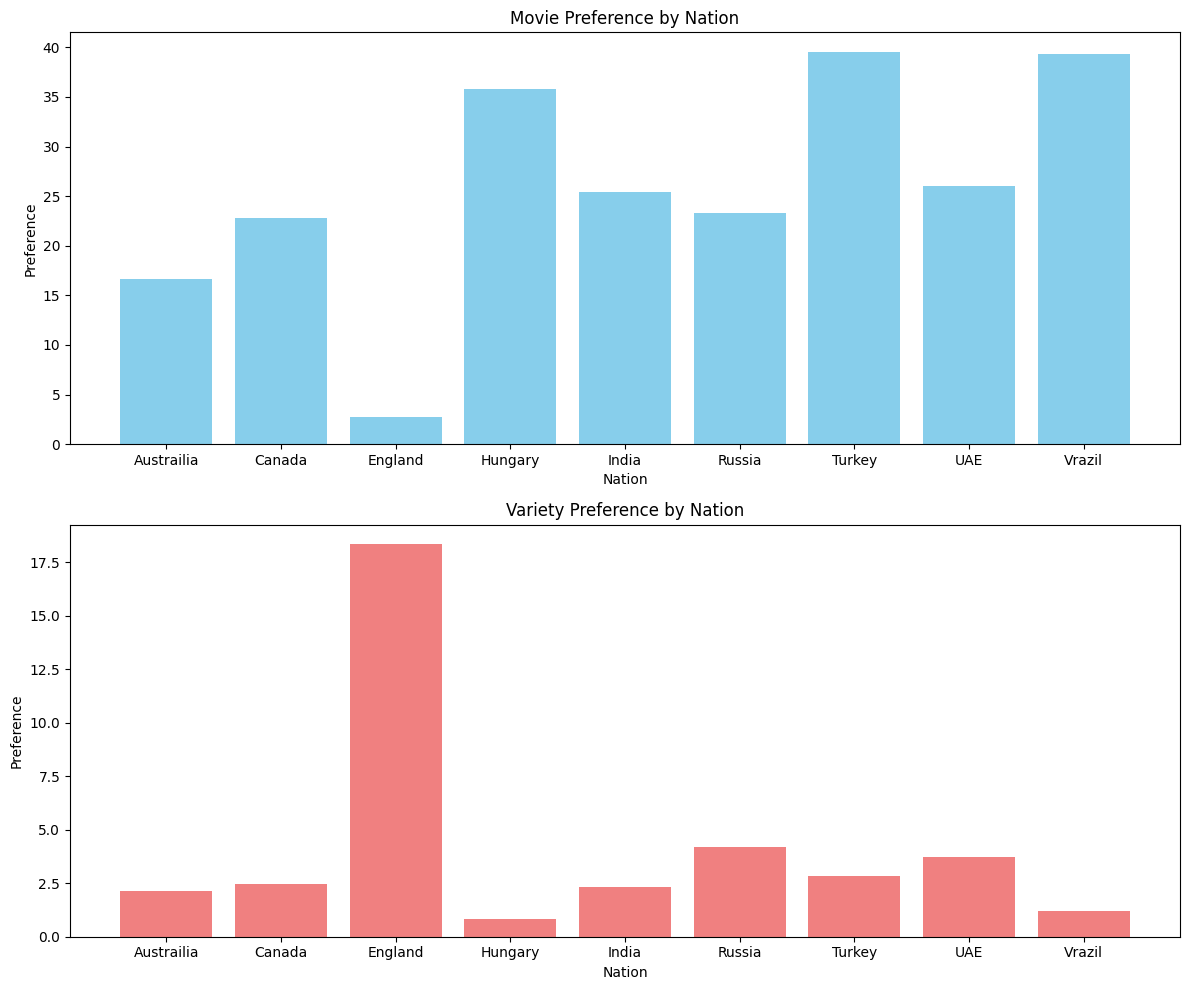

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 여기서 df는 데이터프레임을 나타냅니다.
# 예를 들어, df = pd.read_csv('your_file.csv')로 데이터를 불러왔다고 가정합니다.

# 각 국가에서 영화 선호도
movie_preferences = df.groupby('nation')['movie'].mean()

# 각 국가에서 버라이어티 선호도
variety_preferences = df.groupby('nation')['variety'].mean()

# 그래프로 나타내기
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# 영화 선호도 그래프
axes[0].bar(movie_preferences.index, movie_preferences, color='skyblue')
axes[0].set_title('Movie Preference by Nation')
axes[0].set_xlabel('Nation')
axes[0].set_ylabel('Preference')

# 버라이어티 선호도 그래프
axes[1].bar(variety_preferences.index, variety_preferences, color='lightcoral')
axes[1].set_title('Variety Preference by Nation')
axes[1].set_xlabel('Nation')
axes[1].set_ylabel('Preference')

plt.tight_layout()
plt.show()


연도별(2019년) 선호장르를 볼 수 있는 그래프를 나타내었습니다.

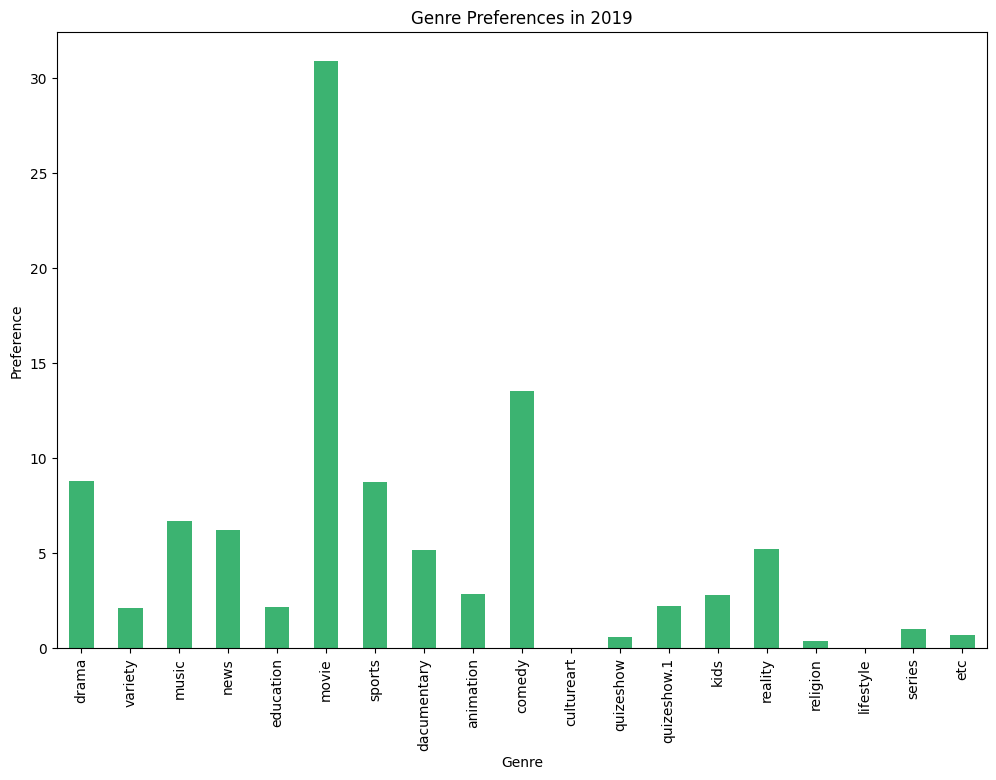

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 여기서 df는 데이터프레임을 나타냅니다.
# 예를 들어, df = pd.read_csv('your_file.csv')로 데이터를 불러왔다고 가정합니다.

# 2019년 데이터 필터링
df_2019 = df[df['year'] == 2019]

# 각 장르의 선호도 평균 계산
genre_preferences_2019 = df_2019[['drama', 'variety', 'music', 'news', 'education', 'movie', 'sports',
                                    'dacumentary', 'animation', 'comedy', 'cultureart', 'quizeshow',
                                    'quizeshow.1', 'kids', 'reality', 'religion', 'lifestyle', 'series',
                                    'etc']].mean()

# 그래프로 나타내기
plt.figure(figsize=(12, 8))
genre_preferences_2019.plot(kind='bar', color='mediumseagreen')
plt.title('Genre Preferences in 2019')
plt.xlabel('Genre')
plt.ylabel('Preference')
plt.show()


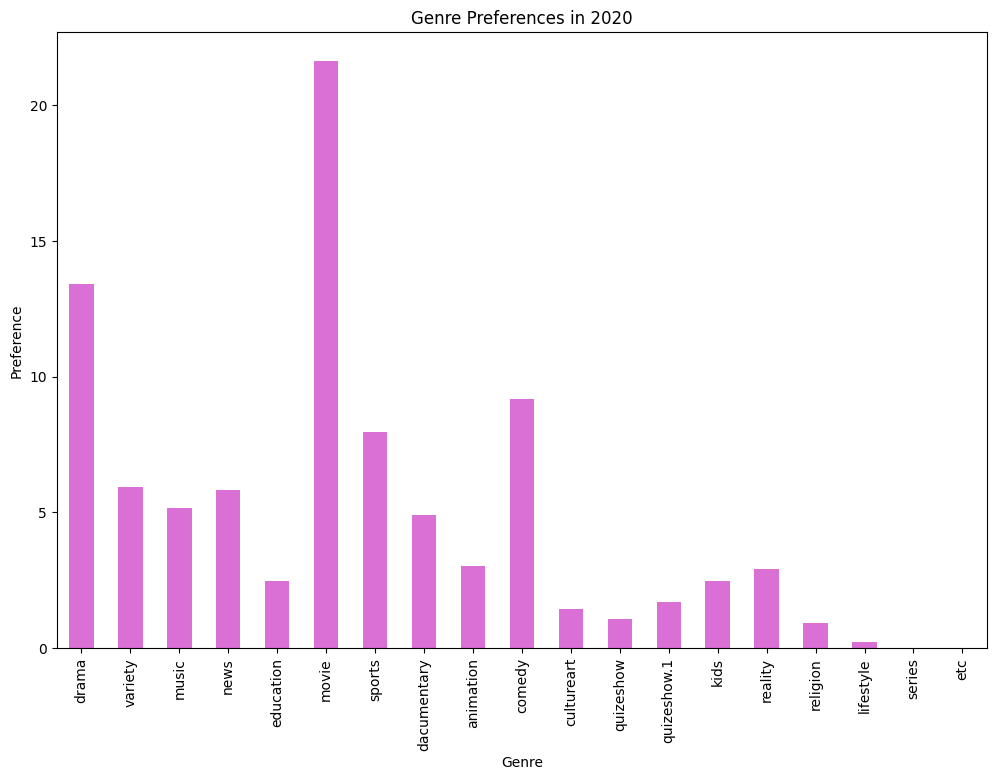

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 여기서 df는 데이터프레임을 나타냅니다.
# 예를 들어, df = pd.read_csv('your_file.csv')로 데이터를 불러왔다고 가정합니다.

# 2020년 데이터 필터링
df_2020 = df[df['year'] == 2020]

# 각 장르의 선호도 평균 계산
genre_preferences_2020 = df_2020[['drama', 'variety', 'music', 'news', 'education', 'movie', 'sports',
                                    'dacumentary', 'animation', 'comedy', 'cultureart', 'quizeshow',
                                    'quizeshow.1', 'kids', 'reality', 'religion', 'lifestyle', 'series',
                                    'etc']].mean()

# 그래프로 나타내기
plt.figure(figsize=(12, 8))
genre_preferences_2020.plot(kind='bar', color='orchid')
plt.title('Genre Preferences in 2020')
plt.xlabel('Genre')
plt.ylabel('Preference')
plt.show()


역시나 영화가 압도적인 선호도를 나타내는것으로 확인했습니다.

다음은 연도별 클러스터링 군집화 kmeans를 나타낸것입니다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
<ipython-input-19-928c3b7824e9>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_statistics = df.groupby('cluster').mean()


         serial number    year  number_of_cases      drama   variety  \
cluster                                                                
0                 85.5  2020.0           140.74  13.412000  5.914000   
1                 30.5  2019.0           114.70   8.776667  2.118333   

            music      news  education   movie    sports  ...     comedy  \
cluster                                                   ...              
0        5.158000  5.838000   2.462000  21.618  7.976000  ...   9.182000   
1        6.686667  6.216667   2.148333  30.885  8.731667  ...  13.523333   

         cultureart  quizeshow  quizeshow.1      kids  reality  religion  \
cluster                                                                    
0             1.418   1.064000     1.680000  2.484000    2.916  0.930000   
1             0.000   0.591667     2.193333  2.798333    5.230  0.388333   

         lifestyle    series       etc  
cluster                                 
0             0.23 

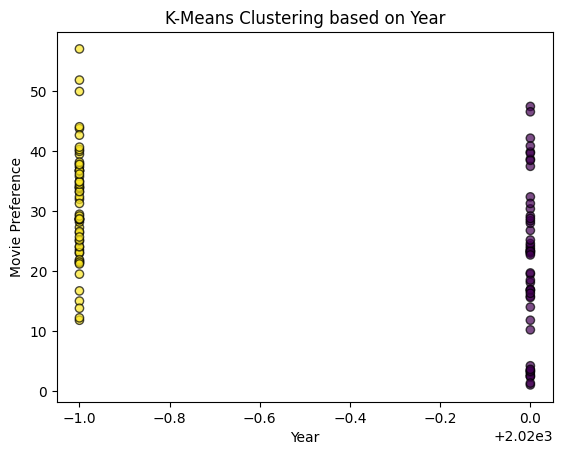

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/오티티분석/ott_analysis.csv", encoding="euc-kr")

# 'year' 열을 기준으로 데이터 선택
data = df[['year']]

# K-평균 군집화를 위한 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# K-평균 군집화
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# 군집별 통계량 확인
cluster_statistics = df.groupby('cluster').mean()

# 군집별 통계량 출력
print(cluster_statistics)

# 군집별 데이터 시각화 (2D 그래프)
plt.scatter(df['year'], df['movie'], c=df['cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('K-Means Clustering based on Year')
plt.xlabel('Year')
plt.ylabel('Movie Preference')
plt.show()
